In [20]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [13]:
mnist=keras.datasets.mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [14]:
temp=xtrain[0]
(img_l,img_w)=temp.shape
print("Image is ",img_l," x ",img_w)

xtrain=xtrain/255
xtest=xtest/255

Image is  28  x  28


In [15]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=11)

Epoch 1/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6600 - accuracy: 0.8330 - val_loss: 0.3553 - val_accuracy: 0.9015
Epoch 2/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3334 - accuracy: 0.9066 - val_loss: 0.2896 - val_accuracy: 0.9194
Epoch 3/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2830 - accuracy: 0.9205 - val_loss: 0.2556 - val_accuracy: 0.9277
Epoch 4/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2520 - accuracy: 0.9298 - val_loss: 0.2330 - val_accuracy: 0.9352
Epoch 5/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2289 - accuracy: 0.9367 - val_loss: 0.2155 - val_accuracy: 0.9387
Epoch 6/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2106 - accuracy: 0.9413 - val_loss: 0.1982 - val_accuracy: 0.9434
Epoch 7/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1956 - accuracy: 0.9455 - val_loss: 0.1897 - val_accuracy:

In [17]:
(test_loss,test_acc)=model.evaluate(xtest,ytest)
print("Loss %.3f"%test_loss)
print("Accuracy %.3f"%test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1527 - accuracy: 0.9545
Loss 0.153
Accuracy 0.955


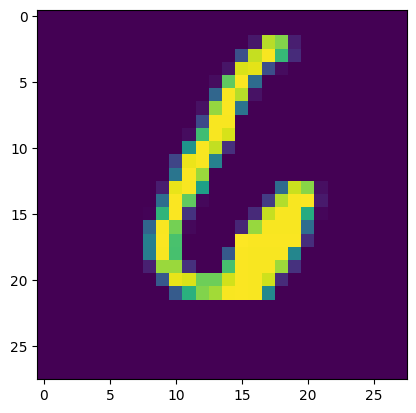

In [21]:
n=random.randint(0,9999)
plt.imshow(xtest[n])
plt.show()

In [23]:
predicted=model.predict(xtest)
import numpy as np
print("Target ",ytest[n])
print("Predicted ",np.argmax(predicted[n]))

313/313 [==============================] - 1s 2ms/step
Target  6
Predicted  6


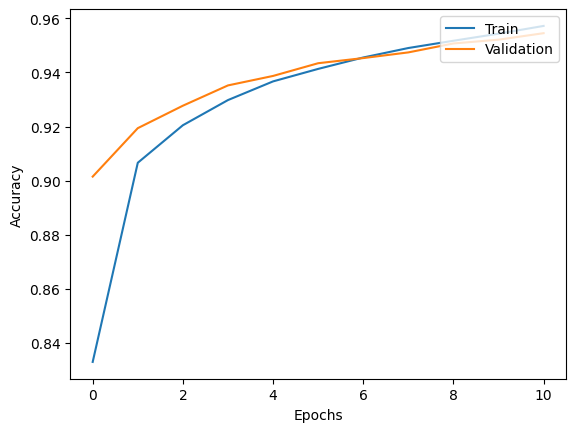

In [24]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"],loc="upper right")
plt.show()

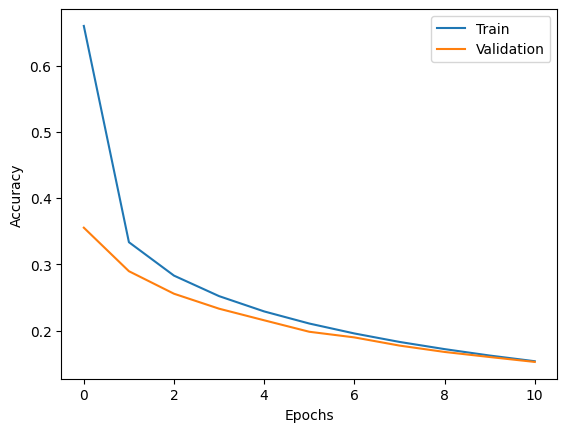

In [25]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"],loc="upper right")
plt.show()